## Word Count Study

Here, we visualize and study the number of specific words that are of interest, and how these counts are distributed within the data.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [103]:
# Load the count data
data_file = './npy_dir/counts.npy'
count_data = np.load(data_file, allow_pickle=True)
count_data = count_data.item()
count_data

{'money': array([0., 0., 0., ..., 0., 1., 0.]),
 'yo': array([0., 0., 0., ..., 0., 0., 0.]),
 'shit': array([0., 0., 0., ..., 0., 0., 0.]),
 'night': array([0., 1., 0., ..., 0., 0., 0.]),
 'day': array([0., 0., 0., ..., 0., 6., 0.])}

In [104]:
counts_money = count_data['money']
counts_shit = count_data['shit']
counts_hello = count_data['yo']
counts_christmas = count_data['day']
counts_money

array([0., 0., 0., ..., 0., 1., 0.])

In [4]:
# Load the umap data
umap_data = np.load('./npy_dir/umap.npy')

In [102]:
# The wrapper function that handles data for any word and produces a scatter plot
def scatter_plot(count_data, umap_data, word, num_threshold=5):
    '''Make a 2D scatter plot of songs according to UMAP output.
       Colormap in the plot corresponds to the number of times that the word is used in that song.
       If number of usage of the word in a song is less than num_threshold, the song is thrown out.
    '''
    counts = count_data[word]
    
    # Clean the data with few counts (too much clutter in visualization)
    idx = np.argwhere(counts > num_threshold)
    counts_clean = counts[idx].flatten()
    umap_data_clean = umap_data[idx].squeeze()
    
    # Do the plotting
    fig = plt.figure()
    ax = plt.subplot(1,1,1)
    plt.scatter(
        umap_data_clean[:,0],
        umap_data_clean[:,1],
        c=counts_clean,
        cmap='viridis',
        alpha=0.7
    )
    ax.set_xlabel('UMAP 1')
    ax.set_ylabel('UMAP 2')
    ax.set_title(f'Usage of word "{word}"')
    ax.set_xlim(-5,7)
    ax.set_ylim(-6,6)
    cbar = plt.colorbar()
    cbar.set_label('Counts')
    fig.savefig(f'./visualizations/{word}_plot.png')
    plt.show()

def scatter_plot_2by2(count_data, umap_data, word_list, num_threshold=5):
    fig = plt.figure(figsize=(14,8))
    for (iword, word) in enumerate(word_list):
        counts = count_data[word]
        
        # Clean the data with few counts (too much clutter in visualization)
        idx = np.argwhere(counts > num_threshold)
        counts_clean = counts[idx].flatten()
        umap_data_clean = umap_data[idx].squeeze()
        
        ax = plt.subplot(2, 2, iword+1)
        plt.scatter(
            umap_data_clean[:,0],
            umap_data_clean[:,1],
            c=counts_clean,
            cmap='viridis',
            alpha=0.7
        )
        
        ax.set_xlabel('UMAP 1')
        ax.set_ylabel('UMAP 2')
        ax.set_title(f'Usage of word "{word}"')
        ax.set_xlim(-5,7)
        ax.set_ylim(-6,6)
        cbar = plt.colorbar()
        cbar.set_label('Counts')
    
    plt.rcParams.update({'font.size' : 14})
    plt.subplots_adjust(hspace=0.4)
    #fig.savefig('./visualizations/2by2counts.png')
    plt.show()



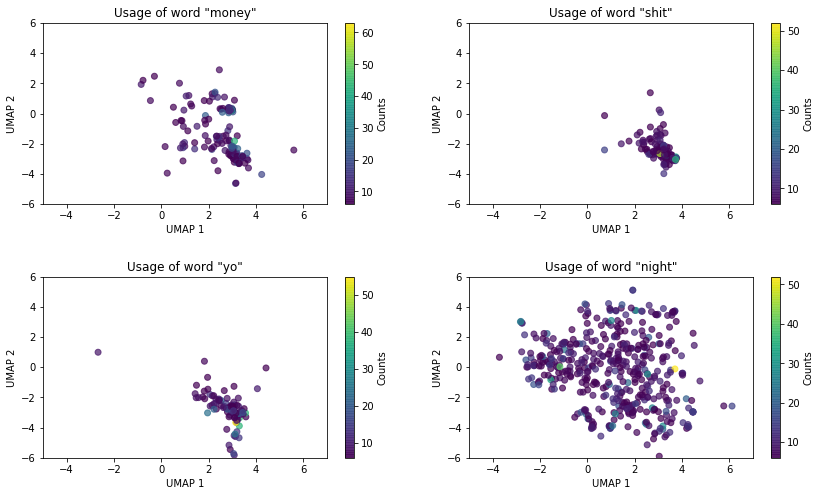

In [105]:
words = ['money', 'shit', 'yo', 'night'] 
#for word in words:
#    scatter_plot(count_data, umap_data, word)

scatter_plot_2by2(count_data, umap_data, words)

Some of them look kinda good!

Can work on adding label information corresponding to maximum usage of some words etc.

## Matching Number of Words with Song Information

Here, we look at the information about the songs where certain words are used most frequently.

In [7]:
# Load labels
label_data = np.load('./npy_dir/labels.npy')
label_data

array([['ABBA', 'Ahes My Kind Of Girl'],
       ['ABBA', 'Andante, Andante'],
       ['ABBA', 'As Good As New'],
       ...,
       ['Ziggy Marley', 'Freedom Road'],
       ['Ziggy Marley', 'G7'],
       ['Ziggy Marley', 'Generation']], dtype='<U76')

In [108]:
def find_top_songs(label_data, count_data, word, n=5):
    '''Given the song label data and word count data, 
    find top n songs where the given word is used most frequently.
    Outputs the artist, song name and the corresponding word count.
    '''
    counts = count_data[word]
    args = counts.argsort()
    
    # Get the indices of top 5 songs, in descending order
    args_max = args[-n:][::-1]
    song_info = label_data[args_max]
    top_counts = counts[args_max]
    
    # Output message
    print(f'TOP {n} SONGS FOR: {word.upper()}')
    for i in range(n):
        print(f'{i+1}. {song_info[i][0]}, {song_info[i][1]}, {int(top_counts[i])}')
    print('*'*20)
        
for word in words:
    find_top_songs(label_data, count_data, word)


TOP 5 SONGS FOR: MONEY
1. Fabolous, Money Money Money Shouts, 63
2. James Taylor, Money Machine, 59
3. Miley Cyrus, Love, Money, Party, 46
4. Young Buck, Money Good, 43
5. R. Kelly, Money Makes The World Go Round, 37
********************
TOP 5 SONGS FOR: SHIT
1. YG, Still Brazy, 52
2. Vanilla Ice, Dirty South, 46
3. YG, One Time Comin, 35
4. The Weeknd, Live For, 33
5. Snoop Dogg, Game Dont Wait, 29
********************
TOP 5 SONGS FOR: YO
1. Kid Rock, Yo Da Lin In The Valley, 55
2. Lady Gaga, A-YO, 40
3. Puff Daddy, Fake Thugs Dedication, 38
4. Usher, Good Ol Ghetto, 38
5. Ice Cube, Check Yo Self, 28
********************
TOP 5 SONGS FOR: NIGHT
1. Gloria Estefan, Night Bring Me My Lover, 52
2. Paul McCartney, Beautiful Night, 40
3. Donna Summer, Sunset People, 33
4. Cheap Trick, Through The Night, 30
5. Lady Gaga, Marry The Night, 29
********************


## Some More Visualizations

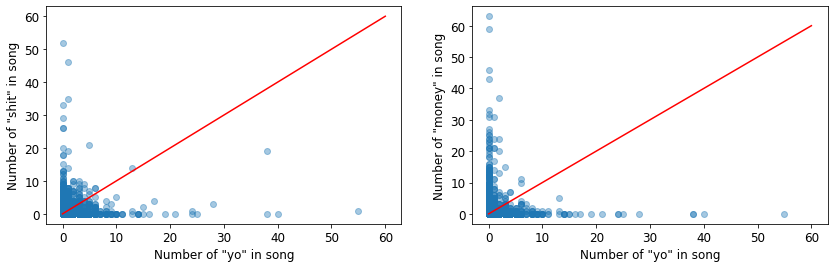

In [100]:
fig = plt.figure(figsize=(14,4))
ax1 = plt.subplot(1,2,1)
ax1.scatter(count_data['yo'], count_data['shit'], alpha=0.4)
ax1.plot(np.linspace(0,60), np.linspace(0,60), 'r')
ax1.set_xlabel('Number of "yo" in song')
ax1.set_ylabel('Number of "shit" in song')

ax2 = plt.subplot(1,2,2)
ax2.scatter(count_data['yo'], count_data['money'], alpha=0.4)
ax2.plot(np.linspace(0,60), np.linspace(0,60), 'r')
ax2.set_xlabel('Number of "yo" in song')
ax2.set_ylabel('Number of "money" in song')

plt.rcParams.update({'font.size' : 10})

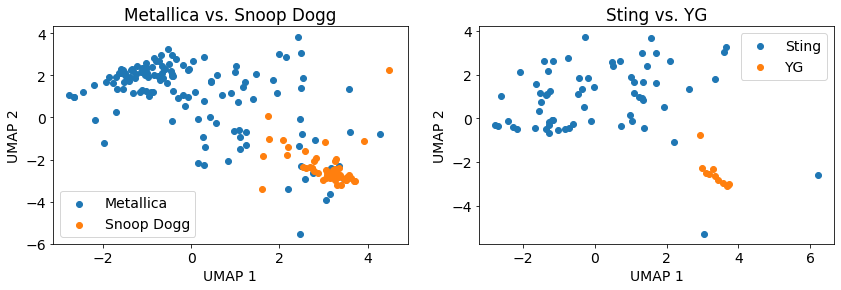

In [129]:
# Compare songs of two artists visually
def plot_comparison(label_data, umap_data, artist1_list, artist2_list):
    '''Given two artists, plot the songs of each artist according to the UMAP output.'''
    is_artist1 = label_data[:,0] == artist1_list[0]
    is_artist2 = label_data[:,0] == artist1_list[1]
    
    umap_data_artist1 = umap_data[is_artist1]
    umap_data_artist2 = umap_data[is_artist2]
    
    umap_artist1_list = [umap_data_artist1, umap_data_artist2]
    
    # Do the plotting
    fig = plt.figure(figsize=(14,4))
    for i, artist in enumerate(artist2_list):
        is_artist = label_data[:,0] == artist
        umap_data_artist = umap_data[is_artist]
        ax = plt.subplot(1,2,i+1)
        ax.scatter(umap_artist1_list[i][:,0], umap_artist1_list[i][:,1], label=f'{artist1_list[i]}')
        ax.scatter(umap_data_artist[:,0], umap_data_artist[:,1], label=f'{artist}')
        ax.set_xlabel('UMAP 1')
        ax.set_ylabel('UMAP 2')
        ax.set_title(f'{artist1_list[i]} vs. {artist}')
        plt.legend()
    fig.savefig('./visualizations/artist_comparison.png')
    plt.show()
    
plot_comparison(label_data, umap_data, ['Metallica', 'Sting'], ['Snoop Dogg', 'YG'])